In [ ]:
import glob

from potoo.plot import *
from potoo.util import *
import sklearn

from cache import *
from datasets import *
from features import *
from load import *
from sp14.model import *
from util import *

figsize('inline_short');

In [ ]:
recs_paths = load_recs_paths()
display(
    recs_paths.shape,
    recs_paths.groupby('dataset').head(5),
    recs_paths.dataset.value_counts(),
)

(51703, 2)

dataset                                                                                  path
0                recordings                                            recordings/black phoebe, chirps, noise.wav
1                recordings                                     recordings/black phoebe, sitting and catching.wav
2                recordings                                                         recordings/caique purring.wav
3                recordings                                                             recordings/cal towhee.wav
4                recordings                        recordings/chickadee funny noise, other chirp song sparrow.wav
51           recordings-new              recordings-new/BEWR 20171007 Bewicks Wren (Coyote Hills parking lot).wav
52           recordings-new          recordings-new/BEWR 20171007 Bewicks Wren 2 (Coyote Hills parking lot) 2.wav
53           recordings-new            recordings-new/BEWR 20171007 Bewicks Wren 2 (Coyote Hills parking lot).wav
54           recordings-new                           recordings-new/bg noise- ocean- wind- etc- Hwy 1 Mt Tam.wav
55           recordings-new                                      recordings-new/black throated gray- kings rd.wav
137    peterson-field-guide                                   peterson-field-guide/bewwre/audio/43220301 Song.mp3
138    peterson-field-guide                                   peterson-field-guide/bewwre/audio/43220321 Song.mp3
139    peterson-field-guide                                   peterson-field-guide/bewwre/audio/43220351 Song.mp3
140    peterson-field-guide                         peterson-field-guide/bewwre/audio/43220371 Song (2 types).mp3
141    peterson-field-guide             peterson-field-guide/bewwre/audio/43220391 Song, Chatter, Snarl, etc..mp3
478           birdclef-2015                                     birdclef-2015/organized/wav/00000-2015-amazon.wav
479           birdclef-2015                                     birdclef-2015/organized/wav/00001-2014-amazon.wav
480           birdclef-2015                                     birdclef-2015/organized/wav/00002-2014-amazon.wav
481           birdclef-2015                                     birdclef-2015/organized/wav/00003-2014-amazon.wav
482           birdclef-2015                                     birdclef-2015/organized/wav/00004-2014-amazon.wav
33681            warblrb10k                          dcase-2018/warblrb10k_public_wav/000e088a-69f7-4d7a-ba7b.wav
33682            warblrb10k                          dcase-2018/warblrb10k_public_wav/0011e7f9-ec1e-4f3a-a70f.wav
33683            warblrb10k                          dcase-2018/warblrb10k_public_wav/001277e4-24c2-4b8e-a6a8.wav
33684            warblrb10k                          dcase-2018/warblrb10k_public_wav/001fceab-9866-48e8-a169.wav
33685            warblrb10k                          dcase-2018/warblrb10k_public_wav/00268cc3-03e8-4e62-bee2.wav
41681            ff1010bird                                                     dcase-2018/ff1010bird_wav/100.wav
41682            ff1010bird                                                  dcase-2018/ff1010bird_wav/100180.wav
41683            ff1010bird                                                  dcase-2018/ff1010bird_wav/100181.wav
41684            ff1010bird                                                  dcase-2018/ff1010bird_wav/100250.wav
41685            ff1010bird                                                  dcase-2018/ff1010bird_wav/100263.wav
49371                nips4b                                          nips4b/all_wav/nips4b_birds_testfile0001.wav
49372                nips4b                                          nips4b/all_wav/nips4b_birds_testfile0002.wav
49373                nips4b                                          nips4b/all_wav/nips4b_birds_testfile0003.wav
49374                nips4b                                          nips4b/all_wav/nips4b_birds_testfile0004.wav
49375                nips4b   

birdclef-2015           33203
warblrb10k               8000
ff1010bird               7690
nips4b                   1687
mlsp-2013                 645
peterson-field-guide      341
recordings-new             86
recordings                 51
Name: dataset, dtype: int64

In [ ]:
recs = load_recs_data(
    (recs_paths
        .groupby('dataset')
        .apply(lambda df: df.sample(50, random_state=0))  # For faster dev
        .reset_index(drop=True)
    ),
    # FIXME pickling AudioSegment's across processes makes this (1) slow and (2) super-linearly slow
    #   - TODO We want 'processes' par for converting audio to std .wav format and 'threads' par for loading from std
    #     .wav, so split the convert (metadata_only=True) + load (metadata_only=False) steps to separate these concerns
    # metadata_only=True, dask_opts=dict(scheduler='processes'),
    metadata_only=False, dask_opts=dict(scheduler='threads'),
)
display(
    recs.shape,
    recs.groupby('dataset').head(3),
    recs[:1].T,
)

[                                                                                          ] | 0% Completed |  0.0s

[#                                                                                         ] | 1% Completed |  0.1s

[##################                                                                        ] | 20% Completed |  0.2s

[##################                                                                        ] | 20% Completed |  0.4s

[####################                                                                      ] | 22% Completed |  0.7s

[######################                                                                    ] | 25% Completed |  0.9s

[######################                                                                    ] | 25% Completed |  1.0s

[#########################                                                                 ] | 28% Completed |  1.1s

[#########################                                                                 ] | 28% Completed |  1.3s

[################################                                                          ] | 36% Completed |  1.4s

[###########################################                                               ] | 48% Completed |  1.5s

[###################################################                                       ] | 57% Completed |  1.6s

[########################################################                                  ] | 62% Completed |  1.7s

[#########################################################                                 ] | 63% Completed |  1.9s

[##############################################################                            ] | 70% Completed |  2.0s

[####################################################################                      ] | 76% Completed |  2.1s

[#########################################################################                 ] | 81% Completed |  2.2s

[###################################################################################       ] | 92% Completed |  2.3s

[##########################################################################################] | 100% Completed |  2.5s

(400, 10)

dataset                                                                              name species species_query                                                 basename  duration_s  samples_mb  samples_n                                                                                                                                                                                                  samples                                                                                                                                    audio
0           birdclef-2015                                     birdclef-2015/organized/wav/02358-2014-amazon    XXXX          None                                        02358-2014-amazon       6.040       0.254     133182  [-458, -2425, -2445, -619, 70, -201, -1117, -1158, 1191, 2626, 314, -1827, -918, 473, 837, 1450, 1367, -396, -1078, 470, 1440, 1443, 1456, 70, -1586, -1285, -1108, -1591, -543, 290, -212, 358, 120...                                      birdclef-2015/organized/wav/02358-2014-amazon: 1 channels, 16 bit, sampled @ 22.05 kHz, 6.040s long
1           birdclef-2015                                     birdclef-2015/organized/wav/00628-2014-amazon    XXXX          None                                        00628-2014-amazon      18.064       0.760     398314  [-1256, -396, -557, -1294, 440, 783, -429, -440, -512, -689, -758, -382, 657, 1090, -893, -1793, -468, -671, 447, 299, -41, -10, -1669, -267, 150, -543, -303, -895, 403, 34, -92, -893, -893, 5, -7...                                     birdclef-2015/organized/wav/00628-2014-amazon: 1 channels, 16 bit, sampled @ 22.05 kHz, 18.064s long
2           birdclef-2015                                     birdclef-2015/organized/wav/19597-2015-amazon    XXXX          None                                        19597-2015-amazon      51.985       2.186    1146268  [-2026, -3272, -2662, -3568, -3912, -3806, -4648, -3855, -1365, -77, 2792, 3407, 3062, 4299, 4645, 5322, 4223, 3564, 5376, 5677, 6165, 7531, 7210, 8007, 8589, 6805, 6762, 6730, 5773, 5200, 5128, 6...                                     birdclef-2015/organized/wav/19597-2015-amazon: 1 channels, 16 bit, sampled @ 22.05 kHz, 51.985s long
50             ff1010bird                                                  dcase-2018/ff1010bird_wav/184277    XXXX          None                                                   184277      10.000       0.421     220500  [2303, 4730, 3501, 1939, -1028, -3331, -3035, -2229, -1833, 121, 1102, -126, -1110, -1322, -859, -1106, -631, 80, 2222, 4053, 2780, 1479, 437, -2301, -5195, -7366, -7048, -6365, -6242, -5371, -303...                                                  dcase-2018/ff1010bird_wav/184277: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long
51             ff1010bird                                                  dcase-2018/ff1010bird_wav/191743    XXXX          None                                                   191743      10.000       0.421     220500  [-179, 261, 858, 648, -403, -1327, -1140, -336, 24, -982, -2158, -1777, -81, 1164, 997, 71, -420, 68, 957, 1391, 1163, 779, 542, 236, 320, 962, 1594, 1827, 962, -432, -890, 242, 1446, 1459, 367, -...                                                  dcase-2018/ff1010bird_wav/191743: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long
52             ff1010bird                                                  dcase-2018/ff1010bird_wav/194578    XXXX          None                                                   194578      10.000       0.421     220500  [-178, -45, 654, 1295, 2069, 1446, 773, 653, 508, 643, 390, 1540, 1603, 1276, 1326, 576, 230, 374, 594, 1725, 3389, 2825, 1862, 1656, 2034, 1823, 604, -991, -1544, -1106, 268, 730, -737, -1903, -8...                                                  dcase-2018/ff1010bird_wav/194578: 1 channels, 16 bit, sampled @ 22.05 kHz, 10.000s long
100             mlsp-2013   mlsp-2013/mlsp_contest_dataset/essential_data/src_wavs/PC1_20090513_07

0
dataset                                                                                                                                                                                                  birdclef-2015
name                                                                                                                                                                     birdclef-2015/organized/wav/02358-2014-amazon
species                                                                                                                                                                                                           XXXX
species_query                                                                                                                                                                                                     None
basename                                                                                                                                                                                             02358-2014-amazon
duration_s                                                                                                                                                                                                        6.04
samples_mb                                                                                                                                                                                                       0.254
samples_n                                                                                                                                                                                                       133182
samples        [-458, -2425, -2445, -619, 70, -201, -1117, -1158, 1191, 2626, 314, -1827, -918, 473, 837, 1450, 1367, -396, -1078, 470, 1440, 1443, 1456, 70, -1586, -1285, -1108, -1591, -543, 290, -212, 358, 120...
audio                                                                                                              birdclef-2015/organized/wav/02358-2014-amazon: 1 channels, 16 bit, sampled @ 22.05 kHz, 6.040s long

In [ ]:
from features import *
row = recs.iloc[0]
dataclasses.asdict(Recording(**{k: v for k, v in dict(row).items() if k in [x.name for x in dataclasses.fields(Recording)]}))

{
  'audio': birdclef-2015/organized/wav/02358-2014-amazon: 1 channels, 16 bit, sampled @ 22.05 kHz, 6.040s long,
  'basename': '02358-2014-amazon',
  'dataset': 'birdclef-2015',
  'duration_s': 6.04,
  'name': 'birdclef-2015/organized/wav/02358-2014-amazon',
  'samples': array([ -458, -2425, -2445, ...,    40,    20,    -8], dtype=int16),
  'samples_mb': 0.2540245056152344,
  'samples_n': 133182,
  'species': 'XXXX',
  'species_query': None,
}

In [ ]:
# Compute spectros
model = Model(verbose_config=False)
recs['spectro'] = Model._spectros(df_to_recs(recs), **model.config.patch_config.spectro_config)

[Memory]41.1s, 0.7min   : Loading _spectros from /Users/danb/hack/bubo/data/cache/joblib/sp14/model/_spectros/e5678bbda298f4e506111b2c6bc18058


____________________________________________spectros cache loaded - 1.7s, 0.0min


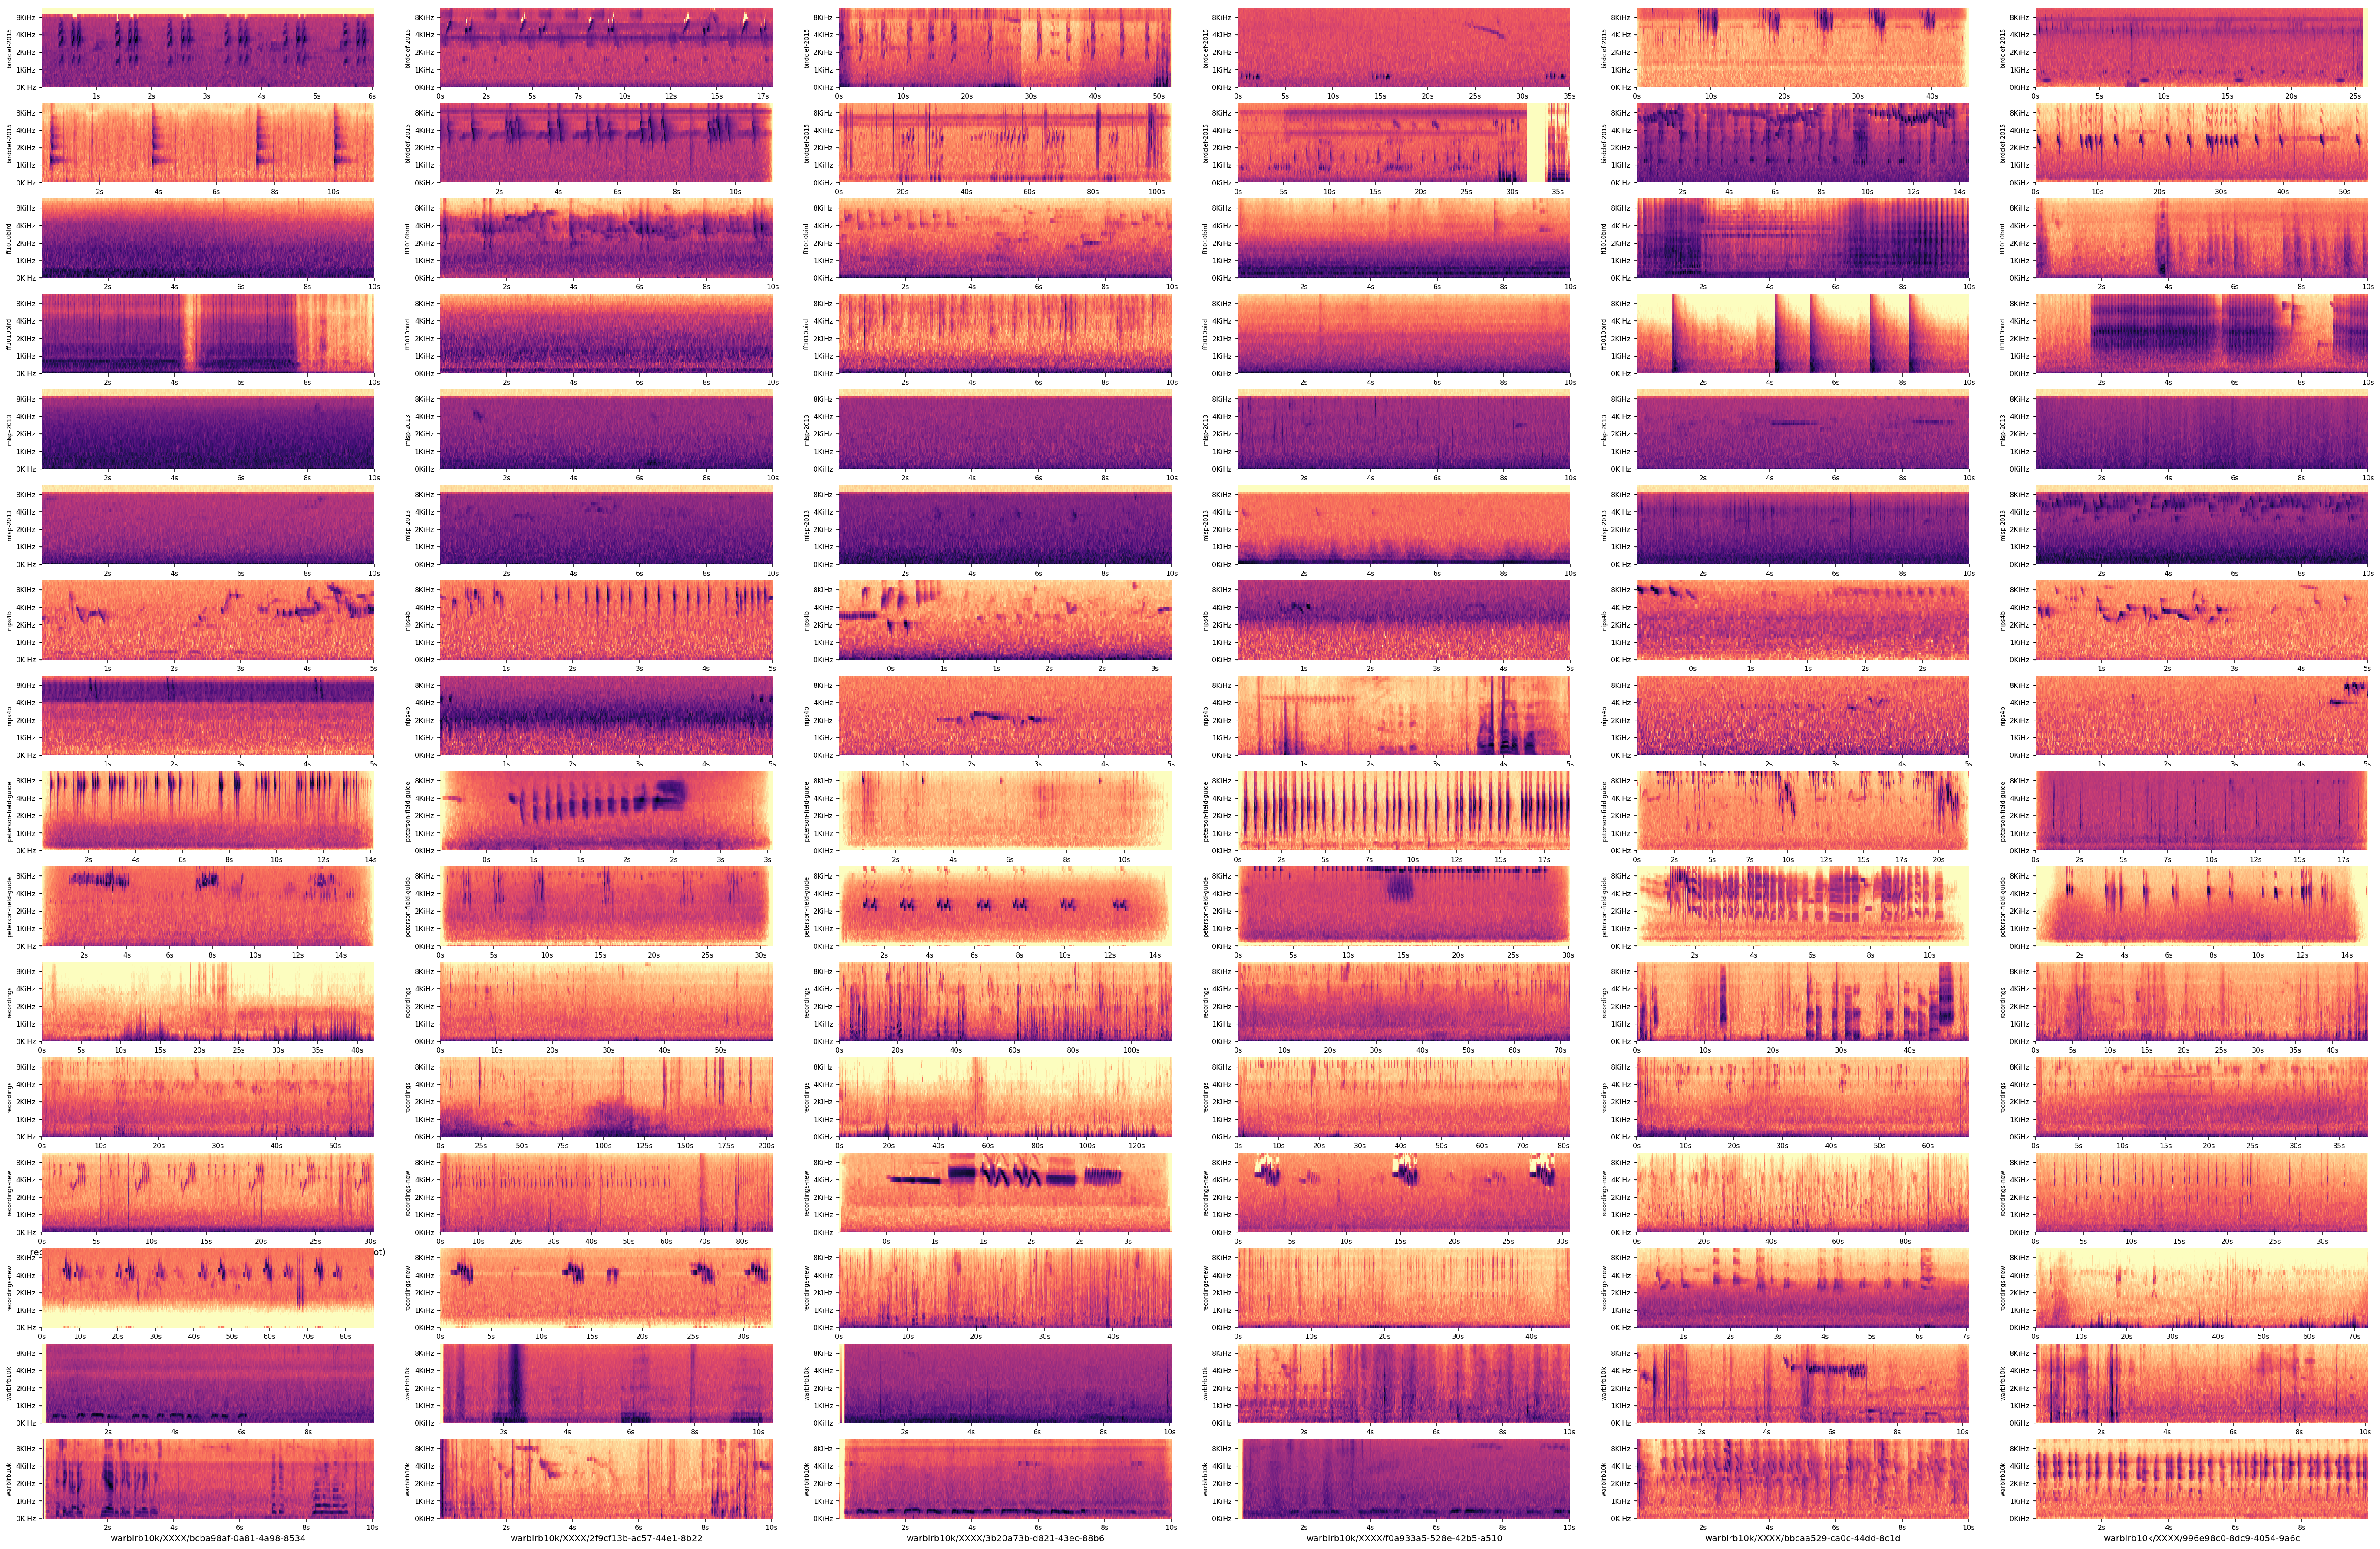

CPU times: user 1min 1s, sys: 10.2 s, total: 1min 12s
Wall time: 39.9 s


In [ ]:
%%time
# figsize(width=24, aspect_ratio=1/16)
# figsize(width=24, aspect_ratio=1)
# figsize('inline')
# figsize('square')
# figsize('full')
figsize('full_dense')
cols, rows_per_dataset = 6, 2
# cols, rows_per_dataset = 2, 1
spectros_df = recs.groupby('dataset').head(cols * rows_per_dataset)
n_spectros = len(spectros_df)
for i, row in spectros_df.reset_index(drop=True).iterrows():
    plt.subplot(int(np.ceil(n_spectros / cols)), cols, i + 1)
    row.spectro.plot(show_audio=False, fancy=False)
    plt.ylabel(row.dataset, fontsize='x-small')
plt.show()